In [1]:
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

Using TensorFlow backend.


In [2]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [3]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

Class:  [9]


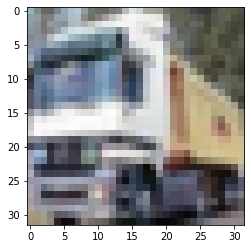

In [4]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[1])
print("Class: ", y_train[1])

Cifar10 classes:

0: airplane										
1: automobile										
2: bird										
3: cat										
4: deer										
5: dog										
6: frog										
7: horse										
8: ship										
9: truck

In [5]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), input_shape=(32,32,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 12, 12, 32)       

In [17]:
train_images =x_train.astype('float32')/255
test_images=x_test.astype('float32')/255

In [18]:
from keras.utils.np_utils import to_categorical

train_labels=to_categorical(y_train)
test_labels=to_categorical(y_test)

In [19]:
val_images=train_images[:10000]
partial_images=train_images[10000:]

val_labels=train_labels[:10000]
partial_labels=train_labels[10000:]

In [20]:
from keras import optimizers
model.compile(loss="categorical_crossentropy",optimizer=optimizers.Adam(0.01),metrics=["accuracy"])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor= "val_accuracy", patience = 7)

In [22]:
history = model.fit(partial_images, partial_labels, validation_data=(val_images,val_labels), epochs=60, callbacks=[es])

Epoch 1/60
1250/1250 [==============================] - 45s 36ms/step - loss: 1.7400 - accuracy: 0.3596 - val_loss: 1.6514 - val_accuracy: 0.4093
Epoch 2/60
1250/1250 [==============================] - 55s 44ms/step - loss: 1.4091 - accuracy: 0.4961 - val_loss: 1.2901 - val_accuracy: 0.5370
Epoch 3/60
1250/1250 [==============================] - 55s 44ms/step - loss: 1.2771 - accuracy: 0.5508 - val_loss: 1.2294 - val_accuracy: 0.5618
Epoch 4/60
1250/1250 [==============================] - 56s 45ms/step - loss: 1.1976 - accuracy: 0.5813 - val_loss: 1.2241 - val_accuracy: 0.5820
Epoch 5/60
1250/1250 [==============================] - 56s 44ms/step - loss: 1.1397 - accuracy: 0.6038 - val_loss: 1.2831 - val_accuracy: 0.5652
Epoch 6/60
1250/1250 [==============================] - 56s 45ms/step - loss: 1.0939 - accuracy: 0.6217 - val_loss: 1.1316 - val_accuracy: 0.6131
Epoch 7/60
1250/1250 [==============================] - 57s 45ms/step - loss: 1.0544 - accuracy: 0.6369 - val_loss: 1.1780 -

In [23]:
metrics = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.9603 - accuracy: 0.6823


In [24]:
print("Loss: ", metrics[0])
print("Accuracy: ",metrics[1])

Loss:  0.9602970480918884
Accuracy:  0.6822999715805054
